CMSC 197 Assignment 1
Josaiah L Borres

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# %matplotlib inline

In [78]:
data = pd.read_csv("movie_metadata_cleaned.csv")


In [79]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [81]:
df=pd.DataFrame(data)

In [82]:
director_counts = df['director_name'].value_counts().head(10).index

In [83]:
print(director_counts)

Index(['0', 'Steven Spielberg', 'Woody Allen', 'Martin Scorsese',
       'Clint Eastwood', 'Ridley Scott', 'Tim Burton', 'Steven Soderbergh',
       'Spike Lee', 'Renny Harlin'],
      dtype='object', name='director_name')


In [84]:
filtered_df = df[df['director_name'].isin(director_counts)]

<Figure size 1000x600 with 0 Axes>

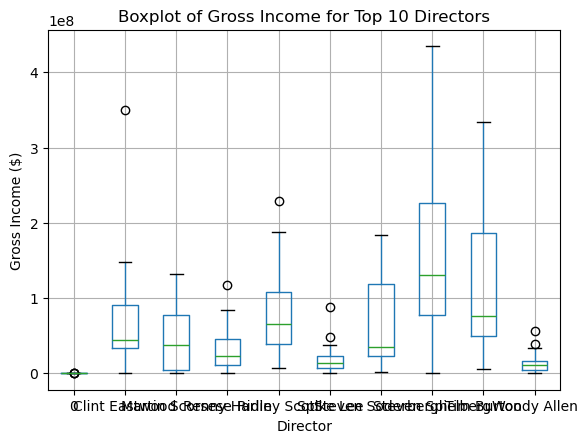

In [85]:
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='gross', by='director_name', )
plt.title('Boxplot of Gross Income for Top 10 Directors')
plt.suptitle('')  
plt.xlabel('Director')
plt.ylabel('Gross Income ($)')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

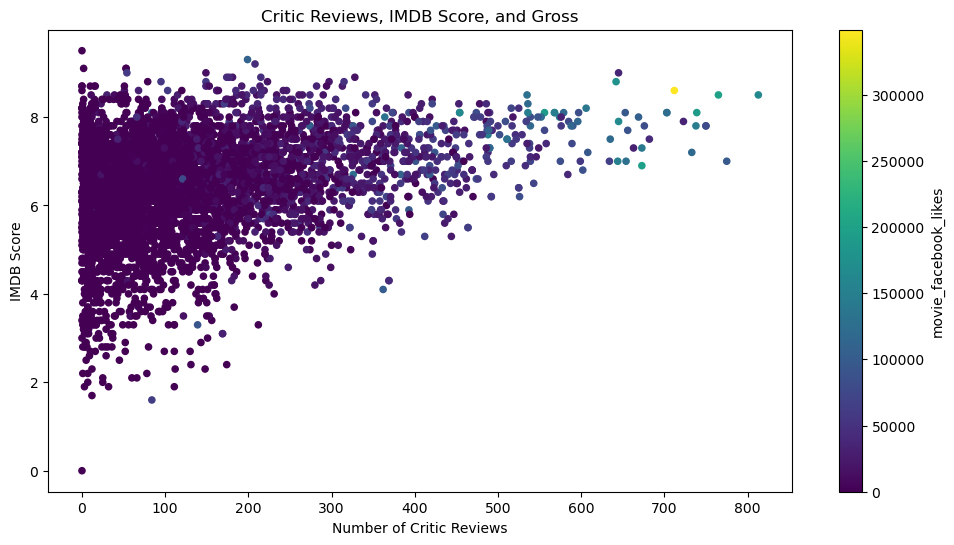

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(kind='scatter', x='num_critic_for_reviews', y='imdb_score', c='movie_facebook_likes', ax=ax, colormap='viridis')
ax.set_title('Critic Reviews, IMDB Score, and Gross')
ax.set_xlabel('Number of Critic Reviews')
ax.set_ylabel('IMDB Score')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [89]:
data['sales'] = data['gross'] - data['budget']

In [90]:
sales=data['sales']

In [91]:
print(sales)

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64


## Which directors garnered the most total sales?

In [93]:
director_sales = data.groupby('director_name')['sales'].sum().sort_values(ascending=False)
print(director_sales.head(10))

director_name
Steven Spielberg     2.451332e+09
George Lucas         1.386641e+09
James Cameron        1.199626e+09
Joss Whedon          1.000887e+09
Chris Columbus       9.417076e+08
Peter Jackson        9.009693e+08
Tim Burton           8.242755e+08
Christopher Nolan    8.082276e+08
Jon Favreau          7.693815e+08
Francis Lawrence     7.555020e+08
Name: sales, dtype: float64


## Plot sales and average likes as a scatterplot. Fit it with a line.

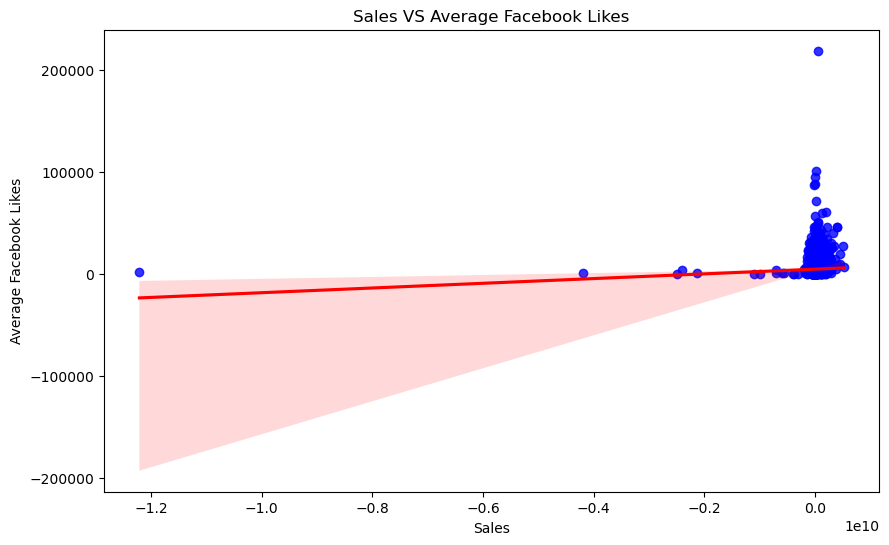

In [117]:


# Calculate the average of Facebook Likes
data['average_facebook_likes'] = data[
    [
        'director_facebook_likes',
        'actor_1_facebook_likes',
        'actor_2_facebook_likes',
        'actor_3_facebook_likes', 
        'cast_total_facebook_likes',
        'movie_facebook_likes'
    ]
].mean(axis=1)

# Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x=data['sales'],
    y=data['average_facebook_likes'],
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Average Facebook Likes')
plt.title('Sales VS Average Facebook Likes')

# Show plot
plt.show()


## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

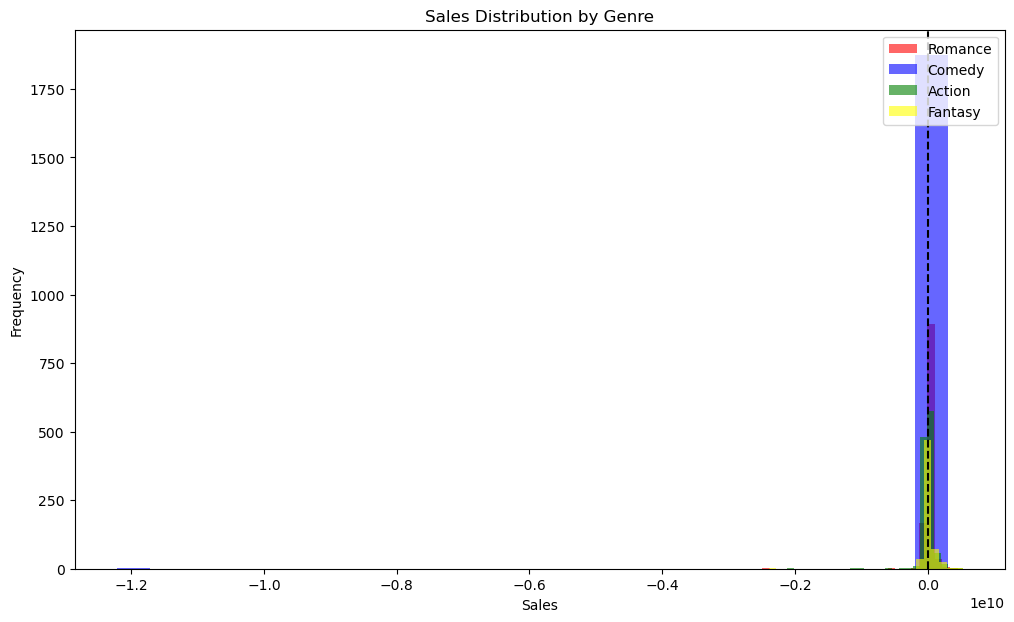

In [130]:
import matplotlib.pyplot as plt

# Define genres and calculate sales for each genre
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']
genre_sales = {genre: data[data['genres'].str.contains(genre, case=False, na=False)]['sales'] for genre in genres}

# Plot histograms
plt.figure(figsize=(12, 7))

colors = ['red', 'blue', 'green', 'yellow']
for genre, color in zip(genres, colors):
    plt.hist(genre_sales[genre], bins=25, alpha=0.6, label=genre, color=color)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution by Genre')
plt.legend(loc='upper right')


# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)


plt.show()




## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it a new column, average_actor_likes.

In [139]:
data['average_actor_likes'] = (data['actor_1_facebook_likes'] + data['actor_2_facebook_likes'] + data['actor_3_facebook_likes']) / 3
print(data['average_actor_likes'])

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64


## Copying the whole dataframe

In [142]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_facebook_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


In [158]:
numeric_cols = data.select_dtypes(include=['integer', 'float']).columns
# Normalize all numeric columns in the DataFrame
normalized = (data[numeric_cols] - data[numeric_cols].min()) / (data[numeric_cols].max() - data[numeric_cols].min())
print(normalized)

      Unnamed: 0  num_critic_for_reviews  duration  director_facebook_likes  \
0       0.000000                0.889299  0.941799                 0.000000   
1       0.000198                0.371464  0.894180                 0.024478   
2       0.000397                0.740467  0.783069                 0.000000   
3       0.000595                1.000000  0.867725                 0.956522   
4       0.000793                0.000000  0.000000                 0.005696   
...          ...                     ...       ...                      ...   
5039    0.999207                0.052891  0.227513                 0.000000   
5040    0.999405                0.015990  0.402116                 0.000000   
5041    0.999603                0.017220  0.529101                 0.000000   
5042    0.999802                0.052891  0.476190                 0.000696   
5043    1.000000                0.000000  0.000000                 0.000000   

      actor_3_facebook_likes  actor_1_facebook_like